In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [3]:

"""
Deterministic variant
Refer to https://www.aimath.org/WWN/populationmodel/chapmar25.pdf for theoretical basis
03/12/20
"""
def SIRDet(beta, gamma, N, dt, I0, time):
    #beta = average number of infective contacts per person per day
    #gamma = recovery rate per day
    #all given rates per day, dt as fraction of day, e.g. dt=1 is 1 day
    t = np.arange(0,time,dt)
    n = len(t)

    S = np.zeros(n) #susceptible
    I = np.zeros(n) #infected
    R = np.zeros(n) #recovered
    T = np.zeros(n) #total cases, includes infected, recovered and dead
    S[0] = N - I0
    I[0] = I0
    T[0] = I[0]
    
    R0 = beta/gamma
    
    
    
    for i in range(1,n):
    
        S[i] = (-beta*S[i-1]*(I[i-1])/N)*dt + S[i-1] 
        I[i] = (beta*S[i-1]*(I[i-1])/N - gamma*I[i-1])*dt + I[i-1]
        R[i] = (gamma*I[i-1])*dt + R[i-1]
        T[i] = I[i] + R[i] 
    return{'t':t,'S':S,'I':I,'R':R, 'Total Cases':T,'Basic Reproduction Number':R0}

In [9]:
"""
Stochastic variant

03/12/20
"""


def SIRSto(beta, gamma, N, dt, I0, time):
    #all given rates per day, time in days, dt as fraction of day, e.g. dt=1 is 1 day
    #beta = average number of infective contacts per person per day
    #gamma = recovery rate per day
    t = np.arange(0,time,dt)
    n = len(t)
    
    S = np.zeros(n) #susceptible
    I = np.zeros(n) #infected
    R = np.zeros(n) #recovered
    T = np.zeros(n) #total cases
   
    S[0] = N - I0
    I[0] = I0
    T[0] = I[0]
    
    R0 = beta/gamma
    
    
    for i in range(1,n):
    
     
        infnew = np.random.binomial(S[i-1],1-np.exp((-beta*(I[i-1])/N)*dt))
        recnew = np.random.binomial(I[i-1],1-np.exp(-gamma*dt))
        
        S[i] = S[i-1] - infnew
        I[i] = I[i-1] + infnew - recnew 
        R[i] = R[i-1] + recnew
        T[i] = I[i] + R[i] 
    return{'t':t,'S':S,'I':I, 'R':R, 'Total Cases':T,'Basic Reproduction Number':R0}

In [18]:
sir_out = pd.DataFrame(SIRSto(0.25, 0.1, 1000, 0.1, 1, 300)) #stochastic
sir_out_det = pd.DataFrame(SIRDet(0.25, 0.1, 1000, 0.1, 1, 300)) #deterministic

In [19]:
sir_out #prints pandas dataframe

,t,S,I,R,Total Cases,Basic Reproduction Number
0,0.0,999.0,1.0,0.0,1.0,2.5
1,0.1,999.0,1.0,0.0,1.0,2.5
2,0.2,999.0,1.0,0.0,1.0,2.5
3,0.3,999.0,1.0,0.0,1.0,2.5
4,0.4,999.0,1.0,0.0,1.0,2.5
...,...,...,...,...,...,...
2995,299.5,999.0,0.0,1.0,1.0,2.5
2996,299.6,999.0,0.0,1.0,1.0,2.5
2997,299.7,999.0,0.0,1.0,1.0,2.5
2998,299.8,999.0,0.0,1.0,1.0,2.5


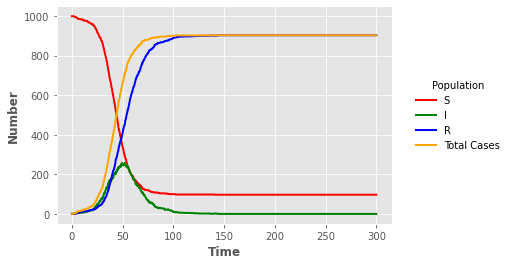

In [15]:
#stochastic plot
plt.style.use("ggplot")
sline = plt.plot("t","S","",data=sir_out,color="red",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="blue",linewidth=2)
tline = plt.plot("t","Total Cases","",data=sir_out,color="orange",linewidth=2)
plt.xlabel("Time (days)",fontweight="bold")
plt.ylabel("Number of people",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.35,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

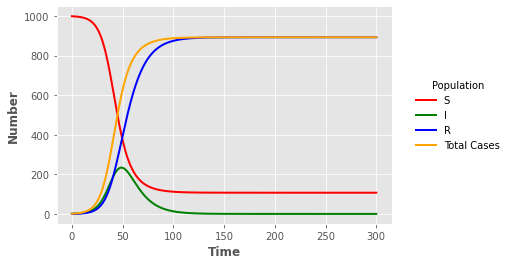

In [16]:
#deterministic deterministic plot
plt.style.use("ggplot")
sline = plt.plot("t","S","",data=sir_out_det,color="red",linewidth=2)
iline = plt.plot("t","I","",data=sir_out_det,color="green",linewidth=2)
rline = plt.plot("t","R","",data=sir_out_det,color="blue",linewidth=2)
tline = plt.plot("t","Total Cases","",data=sir_out_det,color="orange",linewidth=2)
plt.xlabel("Time (days)",fontweight="bold")
plt.ylabel("Number of people",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.35,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

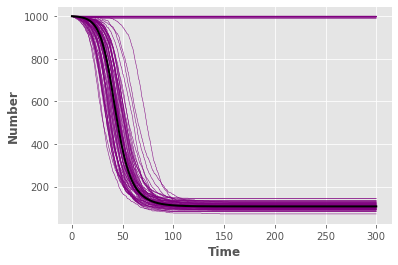

In [17]:
#plots given variable 100 times against its deterministic alternative, currently set to susceptibles
for i in range(0,100):
    sir_out = pd.DataFrame(SIRSto(0.25, 0.1, 1000, 0.1, 1, 300))
    plt.style.use("ggplot")
    line = plt.plot("t","S","",data=sir_out,color="purple",linewidth=0.5)
    plt.xlabel("Time (days)",fontweight="bold")
    plt.ylabel("Number of people",fontweight="bold")
    

linedet = plt.plot("t","S","",data=sir_out_det,color="black",linewidth=2)